Saving stop.jpg to stop (2).jpg


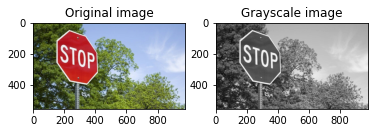

In [ ]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

from google.colab import files
uploaded = files.upload()

img = cv2.imread('stop.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image')

plt.show()

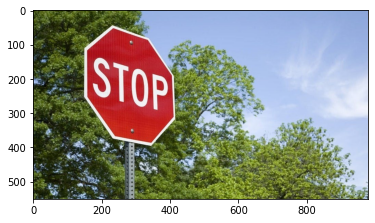

In [ ]:
  
# OpenCV opens images as BRG 
# but we want it as RGB and 
# we also need a grayscale 
# version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# Creates the environment 
# of the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

In [ ]:
 import numpy as np
 import cv2 

In [ ]:
from google.colab import files
uploaded = files.upload()
 
 
src = cv2.imread("football3.jpg")


Saving football3.jpg to football3.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Temp = cv2.imread("ball.png") 

Saving ball.png to ball.png


In [ ]:
 src = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
 temp = cv2.cvtColor(Temp, cv2.COLOR_RGB2GRAY) 

In [ ]:
height, width =src.shape
height, width 

(913, 979)

In [ ]:
H, W = temp.shape
H, W 

(125, 124)

In [ ]:
 methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
             cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] 

In [ ]:
from google.colab.patches import cv2_imshow
for method in methods:
   src2 = src.copy()
   result = cv2.matchTemplate(src2, temp, method)
   min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
   print(min_loc, max_loc)
   if method in [cv2.TM_SQDIFF,cv2.TM_CCORR]:
     lacation = min_loc
   else:
     location = max_loc
   bottom_right = (location[0] + W, location[1] + H)
   cv2.rectangle(src2, location,bottom_right, 255, 5)
   cv2_imshow(src2)
   cv2.waitKey(0)
   cv2.destroyAllWindows() 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2

In [ ]:
# Enable camera
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 420)

# import cascade file for facial recognition
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

'''
    # if you want to detect any object for example eyes, use one more layer of classifier as below:
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")
'''

while True:
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Getting corners around the face
    faces = faceCascade.detectMultiScale(imgGray, 1.3, 5)  # 1.3 = scale factor, 5 = minimum neighbor
    # drawing bounding box around face
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

    '''
    # detecting eyes
    eyes = eyeCascade.detectMultiScale(imgGray)
    # drawing bounding box for eyes
    for (ex, ey, ew, eh) in eyes:
        img = cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 3)
    '''

    cv2.imshow('face_detect', img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyWindow('face_detect')

error: ignored